In [1]:
import pandas as pd
df=pd.read_json("/content/output1(3).json")
df

,text,label
0,"ফ্রান্সের অন্যান্য অনেক পর্যটক স্থানগুলির মতো,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,একদিন লিসা সিদ্ধান্ত নিলো যে বছরের জানুয়ারি থ...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,সাইমা তার দাদীর ৭০তম জন্মদিন উদযাপনের জন্য একট...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,"মোট ৮ জন বন্দী ১ নং কক্ষে ছিল, ২ নং কক্ষে ৯ জন...","[0, 2, 2, 0, 1, 1, 0, 0, 0, 1, 1, 0, 2, 2, 0, ..."
4,মিসেস রেহনুমা অনলাইনে খাবার ডেলিভারি দেন। আজ ত...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...
1779,খাদ্যবহির্ভূত মূল্যস্ফীতি ২০২৪ সালের অক্টোবরে ...,"[0, 0, 0, 0, 1, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, ..."
1780,অক্টোবর ১৯ তারিখ পর্যন্ত মোট রেমিট্যান্সের মধ্...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, ..."
1781,"বাংলাদেশ ব্যাংকের তথ্য অনুযায়ী, অক্টোবরের ১৩ ...","[0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 2, 2, 2, 0, ..."
1782,২০১৬-১৭ অর্থবছরে জিডিপির সাথে দেশের এনটিআর অনু...,"[1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 1, 1, ..."


In [2]:
from sklearn.model_selection import train_test_split

# Original dataset
x = df['text']
y = df['label']

# Step 1: Split into train (80%) and (validation + test) (20%)
train_x, temp_x, train_y, temp_y = train_test_split(x, y, test_size=0.2, random_state=42)

# Step 2: Split (validation + test) (20%) into validation (10%) and test (10%)
val_x, test_x, val_y, test_y = train_test_split(temp_x, temp_y, test_size=0.5, random_state=42)  # 50% of 20% = 10%

# Final data distribution:
# Train: 80%, Validation: 10%, Test: 10%

print(f"Train size: {len(train_x)}")
print(f"Validation size: {len(val_x)}")
print(f"Test size: {len(test_x)}")


Train size: 1427
Validation size: 178
Test size: 179


#Statistical analysis

In [3]:
import pandas as pd
train=pd.concat([train_x,train_y],axis=1)
val=pd.concat([val_x,val_y],axis=1)
test=pd.concat([test_x,test_y],axis=1)
val.shape

(178, 2)

In [ ]:
from collections import Counter
# Function to count label occurrences
def count_labels(label_lists):
    flattened_labels = [label for labels in label_lists for label in labels]
    return Counter(flattened_labels)

# Count labels in each split
train_label_counts = count_labels(train["label"])
val_label_counts = count_labels(val["label"])
test_label_counts = count_labels(test["label"])

# Display results
print(f"Training Set: {len(train)} samples")
print(f"Label counts: {train_label_counts}\n")

print(f"Validation Set: {len(val)} samples")
print(f"Label counts: {val_label_counts}\n")

print(f"Test Set: {len(test)} samples")
print(f"Label counts: {test_label_counts}\n")

Training Set: 1427 samples
Label counts: Counter({0: 43671, 2: 9119, 1: 7762})

Validation Set: 178 samples
Label counts: Counter({0: 5938, 2: 1236, 1: 1010})

Test Set: 179 samples
Label counts: Counter({0: 5763, 2: 1213, 1: 988})



In [4]:
import pandas as pd

def prepare_tag_token(df):
    new_df = pd.DataFrame()

    o_tag = "O"

    for index, rec in df.iterrows():
        ner_tags, ner_tokens = [], []

        text = rec['text']  # Access by column
        labels = rec['label']  # Assuming this is a list of integers [0, 1, 1, 0, 2, 2, ...]

        # tokens = text.split()  # Split the text into tokens
        space_split_tokens = text.split()
        tokens = []
        tokens1=[]
        for token in space_split_tokens:
        # Check if the token ends with specific punctuation
          if token[-1] in [',', '।', '!', '?']:
              # Add the word (without punctuation) to tokens
              tokens1.append(token[:-1])
              # Add the punctuation as a separate token
              tokens1.append(token[-1])
          else:
              # No punctuation, just add the token
              tokens1.append(token)
        special_character=['(', ')','%',':','-','$','—']

        for token in tokens1:
          p=''
          for char in token:

            if (char not in special_character):
              p+=char
            else:
              if(p):
                tokens.append(p)
                tokens.append(char)
                p=''
              else:
                tokens.append(char)
                P=''


          if(p):
            tokens.append(p)
            p=''

        # Iterate over tokens and their corresponding labels
        for i, (token, label) in enumerate(zip(tokens, labels)):
            if label == 0:
                ner_tags.append(o_tag)
            elif label == 1:
                if i == 0 or labels[i - 1] != 1:
                    ner_tags.append("B-X")
                else:
                    ner_tags.append("I-X")
            elif label == 2:
                if i == 0 or labels[i - 1] != 2:
                    ner_tags.append("B-Y")
                else:
                    ner_tags.append("I-Y")

            ner_tokens.append(token)

        # Construct the new row dictionary
        new_row = rec.to_dict()
        new_row['tag'] = ner_tags
        new_row['token'] = ner_tokens


        # Append the new row to the new DataFrame
        new_df = pd.concat([new_df, pd.DataFrame([new_row])], ignore_index=True)

    print('ok')
    # Drop unnecessary columns if they exist
    new_df = new_df.drop(['id', 'text', 'label'], axis=1, errors='ignore')
    return new_df


In [5]:
train = prepare_tag_token(train)
val= prepare_tag_token(val)

ok
ok


In [ ]:
data=train
data["token_count"] = train["token"].apply(len)

# Step 2: Calculate the average and maximum length
average_length = data["token_count"].mean()
max_length = data["token_count"].max()

# Display results
print("Token counts for each sentence:")
print(data[["token", "token_count"]])
print(f"\nAverage sentence length: {average_length:.2f} tokens")
print(f"Maximum sentence length: {max_length} tokens")

Token counts for each sentence:
                                                  token  token_count
0     [পাঁচ, বছর, মেয়াদি, বাংলাদেশ, সঞ্চয়পত্রে, সুদ,...           45
1     [যুক্তরাষ্ট্র, এখন, পর্যন্ত, ২৮২৭টি, অলিম্পিক,...           33
2     [২০২২, এবং, ২০২৩, ছিল, একাধিক, মুদ্রাস্ফীতির, ...           34
3     [মূলধন, পর্যাপ্ততা, ব্যাংকের, সার্বিক, মূলধন, ...           62
4     [শ্যানেলের, সারা, বিশ্বে, ৩৪৫টি, শীর্ষ, মডেল, ...           26
...                                                 ...          ...
1422  [৪৮, %, বলেছেন, যে, তারা, নিবন্ধে, অনেক, বা, ক...           24
1423  [জাতীয়, সঞ্চয়, অধিদপ্তরের, চালু, সঞ্চয়, কর্মসূ...           55
1424  [একটি, পরমাণুর, ভর, সংখ্যা, একটি, পূর্ণসংখ্যা,...           30
1425  [মোট, এফডিআইয়ের, মধ্যে, মূলধন, বা, নতুন, বিনিয়...           35
1426  [লিঙ্কডইন, ব্যবহারকারীরা, কম, বিভ্রান্ত, ।, যা...           42

[1427 rows x 2 columns]

Average sentence length: 42.32 tokens
Maximum sentence length: 197 tokens


#jaccard score

In [ ]:
import pandas as pd

# Example DataFrame (replace with your actual dataset)
data = train

# Step 1: Explode the DataFrame to create a row for each token-tag pair
exploded_data = data.explode(["token", "tag"]).reset_index(drop=True)

# Step 2: Group tokens by their tags
grouped = exploded_data.groupby("tag")["token"].apply(set).reset_index()

# Step 3: Define the Jaccard similarity function
def jaccard_similarity(set1, set2):
    intersection = len(set1.intersection(set2))
    union = len(set1.union(set2))
    return intersection / union if union != 0 else 0

# Step 4: Compute pairwise Jaccard similarity between all tag groups
jaccard_scores = []
for i in range(len(grouped)):
    for j in range(i + 1, len(grouped)):
        tag1, tag2 = grouped.loc[i, "tag"], grouped.loc[j, "tag"]
        set1, set2 = grouped.loc[i, "token"], grouped.loc[j, "token"]
        score = jaccard_similarity(set1, set2)
        jaccard_scores.append((tag1, tag2, score))

# Step 5: Create a DataFrame to display the Jaccard scores
jaccard_df = pd.DataFrame(jaccard_scores, columns=["Tag1", "Tag2", "Jaccard Score"])
print(jaccard_df)


  Tag1 Tag2  Jaccard Score
0  B-X  B-Y       0.029049
1  B-X  I-X       0.103288
2  B-X  I-Y       0.033699
3  B-X    O       0.120035
4  B-Y  I-X       0.030324
5  B-Y  I-Y       0.087747
6  B-Y    O       0.035058
7  I-X  I-Y       0.048066
8  I-X    O       0.104178
9  I-Y    O       0.030274


In [6]:
pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 16.7 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [7]:
from datasets import Dataset, DatasetDict

# Creating instances of CustomDataset for train and test sets
train_dataset = Dataset.from_pandas(train)
val_dataset = Dataset.from_pandas(val)

# Organizing the datasets into a dictionary-like structure
dataset_dict = DatasetDict({
    "train": train_dataset,
    "val": val_dataset
})

In [8]:
dataset_dict

DatasetDict({
    train: Dataset({
        features: ['tag', 'token'],
        num_rows: 1427
    })
    val: Dataset({
        features: ['tag', 'token'],
        num_rows: 178
    })
})

In [9]:
from transformers import AutoTokenizer, AutoModelForTokenClassification
from transformers import pipeline

model_checkpoint = "xlm-roberta-large-finetuned-conll03-german"
tokenizer = AutoTokenizer.from_pretrained(model_checkpoint)



/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/886 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.10M [00:00<?, ?B/s]

In [10]:
cls_labels={
    "O":0,
    "B-X":1,
    "I-X":2,
    "B-Y":3,
    "I-Y":4
}

In [11]:
def align_labels_with_tokens(labels, word_ids):
    new_labels = []
    current_word = None
    for word_id in word_ids:
        if word_id != current_word:
            # Start of a new word!
            current_word = word_id
            label = -100 if word_id is None else cls_labels[labels[word_id]]
            new_labels.append(label)
        elif word_id is None:
            # Special token
            new_labels.append(-100)
        else:
            # Same word as previous token
            label = labels[word_id]
            label = cls_labels[label]
            # If the label is B-XXX we change it to I-XXX
            if label % 2 == 1:
                label += 1
            new_labels.append(label)

    return new_labels

In [12]:
def tokenize_and_align_labels(examples):
    tokenized_inputs = tokenizer(
        examples["token"], truncation=True, is_split_into_words=True, padding=True,
    return_tensors="pt"
    )
    all_labels = examples["tag"]
    new_labels = []
    for i, labels in enumerate(all_labels):
        word_ids = tokenized_inputs.word_ids(i)
        new_labels.append(align_labels_with_tokens(labels, word_ids))

    tokenized_inputs["labels"] = new_labels
    return tokenized_inputs

In [13]:
tokenized_datasets = dataset_dict.map(
    tokenize_and_align_labels,
    batched=True,
    remove_columns=dataset_dict["train"].column_names,
)

Map:   0%|          | 0/1427 [00:00<?, ? examples/s]

Map:   0%|          | 0/178 [00:00<?, ? examples/s]

In [14]:
tokenized_datasets

DatasetDict({
    train: Dataset({
        features: ['input_ids', 'attention_mask', 'labels'],
        num_rows: 1427
    })
    val: Dataset({
        features: ['input_ids', 'attention_mask', 'labels'],
        num_rows: 178
    })
})

In [15]:
from transformers import DataCollatorForTokenClassification

data_collator = DataCollatorForTokenClassification(tokenizer=tokenizer)

In [16]:
batch = data_collator([tokenized_datasets["train"][7]])
batch["labels"]

tensor([[-100,    0,    0,    0,    0,    1,    0,    0,    0,    0,    0,    0,
            0,    0,    3,    4,    4,    4,    4,    4,    0,    0,    0,    0,
            0,    1,    2,    2,    2,    2,    0,    0,    0,    0,    0,    0,
            0,    0,    3,    4,    4,    4,    4,    4,    4,    0,    0,    0,
            0,    0,    1,    0,    0,    0,    0,    0,    0,    0,    0,    3,
            4,    4,    4,    4,    0, -100, -100, -100, -100, -100, -100, -100,
         -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100,
         -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100,
         -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100,
         -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100,
         -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100,
         -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100,
         -100, -100, -100, -

In [17]:
!pip install seqeval

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 3.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for seqeval: filename=seqeval-1.2.2-py3-none-any.whl size=16161 sha256=904c7771396b6d01bcd8a1fb47555f4351c4b3228a4fc141f5dc8c8d8a9855bd
  Stored in directory: /root/.cache/pip/wheels/bc/92/f0/243288f899c2eacdfa8c5f9aede4c71a9bad0ee26a01dc5ead
Successfully built seqeval


In [18]:
pip install evaluate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 3.6 MB/s eta 0:00:00


In [19]:
import evaluate

metric = evaluate.load("seqeval")

In [20]:
label2id = cls_labels

In [21]:
id2label = {v: k for k, v in label2id.items()}

In [22]:
label2id

{'O': 0, 'B-X': 1, 'I-X': 2, 'B-Y': 3, 'I-Y': 4}

In [23]:
import numpy as np
from sklearn.metrics import f1_score

def compute_metrics(eval_preds):
    logits, labels = eval_preds
    predictions = np.argmax(logits, axis=-1)

    # Prepare lists for adjusted predictions and labels
    adjusted_predictions = []
    adjusted_labels = []

    # Assuming 'id2label' and 'metric' are defined and configured correctly
    for label_list, prediction_list in zip(labels, predictions):
        adjusted_label = [id2label[l] for l in label_list if l != -100]
        adjusted_pred = [id2label[p] for p, l in zip(prediction_list, label_list) if l != -100]
#         if f==0:
#             print(adjusted_pred)
#             f=1
        # Ensure the labels and predictions are grouped by sequences
        adjusted_labels.append(adjusted_label)
        adjusted_predictions.append(adjusted_pred)

    # Compute micro and macro F1 using sklearn if necessary
    # Flatten the lists for sklearn computation
    flat_labels = [label for sublist in adjusted_labels for label in sublist]
    flat_predictions = [pred for sublist in adjusted_predictions for pred in sublist]

    # Calculate metrics using the metric module, adjust as per its requirements
    all_metrics = metric.compute(predictions=adjusted_predictions, references=adjusted_labels)

    return {
        "precision": all_metrics.get("overall_precision", 0),
        "recall": all_metrics.get("overall_recall", 0),
        "f1": all_metrics.get("overall_f1", 0),
        "accuracy": all_metrics.get("overall_accuracy", 0)
    }

In [24]:
id2label

{0: 'O', 1: 'B-X', 2: 'I-X', 3: 'B-Y', 4: 'I-Y'}

In [25]:
from transformers import AutoModelForTokenClassification
model = AutoModelForTokenClassification.from_pretrained(
    model_checkpoint,
    id2label=id2label,
    label2id=label2id,
    ignore_mismatched_sizes=True,
    num_labels=len(id2label)
)

pytorch_model.bin:   0%|          | 0.00/2.24G [00:00<?, ?B/s]

Some weights of the model checkpoint at xlm-roberta-large-finetuned-conll03-german were not used when initializing XLMRobertaForTokenClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing XLMRobertaForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLMRobertaForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of XLMRobertaForTokenClassification were not initialized from the model checkpoint at xlm-roberta-large-finetuned-conll03-german and are newly initialized because the shapes did not match:
- classifier.weight: found shape torch.Size([9, 1024]) in the checkpoint and torch.Size([

In [26]:
from transformers import TrainingArguments

args = TrainingArguments(
    output_dir="/content/bert-xy-ner",
    evaluation_strategy="epoch",
    save_strategy="epoch",  # Consider setting to "steps" if you want more frequent checks
    save_total_limit=1,  # Only keep the best model saved
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    learning_rate=3e-5,
    num_train_epochs=15,
    weight_decay=0.001,
    load_best_model_at_end=True,  # Load the best model at the end of training
    metric_for_best_model="eval_loss",  # Choose the metric to use to evaluate the best model
    greater_is_better=False,  # Set to False because a lower loss is better
    push_to_hub=False,
)

/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [27]:
from transformers import Trainer, TrainingArguments

trainer = Trainer(
    model=model,
    args=args,
    train_dataset=tokenized_datasets["train"],
    eval_dataset=tokenized_datasets["val"],
    data_collator=data_collator,
    compute_metrics=compute_metrics,  # Optional metrics for evaluation
    tokenizer=tokenizer,
)

# Train the model
training_result = trainer.train()


<ipython-input-27-471d36ef15bb>:3: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(
wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


Epoch,Training Loss,Validation Loss,Precision,Recall,F1,Accuracy
1,No log,0.251654,0.710339,0.738916,0.724346,0.926016
2,No log,0.232154,0.753702,0.793924,0.773291,0.935970
3,0.281800,0.233719,0.776630,0.802135,0.789176,0.939804
4,0.281800,0.232778,0.764706,0.800493,0.782190,0.940745
5,0.281800,0.219525,0.758755,0.800493,0.779065,0.935768
6,0.131600,0.252185,0.790640,0.790640,0.790640,0.936777
7,0.131600,0.228898,0.762579,0.796388,0.779116,0.939064
8,0.131600,0.294108,0.775000,0.814450,0.794235,0.938660
9,0.071400,0.302136,0.785208,0.819376,0.801928,0.944512
10,0.071400,0.324809,0.777778,0.810345,0.793727,0.940342


Epoch,Training Loss,Validation Loss,Precision,Recall,F1,Accuracy
1,No log,0.251654,0.710339,0.738916,0.724346,0.926016
2,No log,0.232154,0.753702,0.793924,0.773291,0.935970
3,0.281800,0.233719,0.776630,0.802135,0.789176,0.939804
4,0.281800,0.232778,0.764706,0.800493,0.782190,0.940745
5,0.281800,0.219525,0.758755,0.800493,0.779065,0.935768
6,0.131600,0.252185,0.790640,0.790640,0.790640,0.936777
7,0.131600,0.228898,0.762579,0.796388,0.779116,0.939064
8,0.131600,0.294108,0.775000,0.814450,0.794235,0.938660
9,0.071400,0.302136,0.785208,0.819376,0.801928,0.944512
10,0.071400,0.324809,0.777778,0.810345,0.793727,0.940342


In [28]:
from transformers import Trainer

# Assuming you have a trained model using Trainer API
trainer.save_model("/content/bert-xy-ner/checkpoint-895")  # Change path as needed


KeyboardInterrupt: 

In [29]:
from transformers import pipeline

# Replace this with your own checkpoint
model_checkpoint = "/content/bert-xy-ner/checkpoint-895"
token_classifier = pipeline(
    "token-classification", model=model_checkpoint, aggregation_strategy="first"
)

Device set to use cuda:0


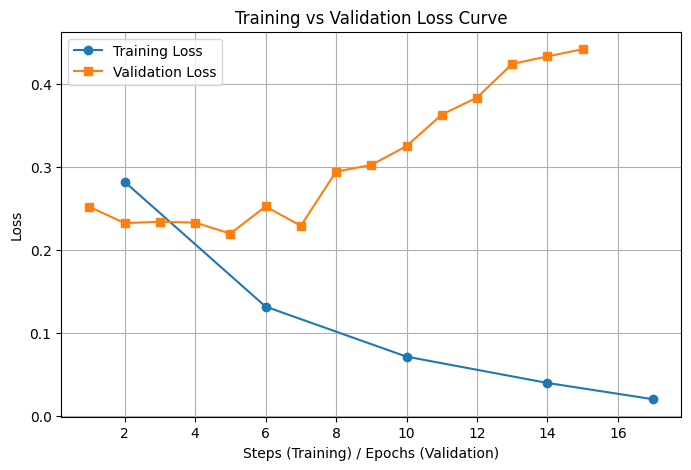

In [37]:
import matplotlib.pyplot as plt

# Extract training and validation losses
train_losses = []
val_losses = []
train_steps = []  # Store the number of times training loss is logged
epochs = []  # Track epochs for validation loss

for i, log in enumerate(trainer.state.log_history):
    if "loss" in log:  # Training loss (logged frequently)
        train_losses.append(log["loss"])
        train_steps.append(i)  # Track step index for x-axis
    if "eval_loss" in log:  # Validation loss (logged per epoch)
        val_losses.append(log["eval_loss"])
        epochs.append(len(val_losses))  # Use epoch count for x-axis

# Plot training and validation loss curves
plt.figure(figsize=(8, 5))
plt.plot(train_steps, train_losses, label="Training Loss", marker='o', linestyle='-')
plt.plot(epochs, val_losses, label="Validation Loss", marker='s', linestyle='-')

plt.xlabel("Steps (Training) / Epochs (Validation)")
plt.ylabel("Loss")
plt.title("Training vs Validation Loss Curve")
plt.legend()
plt.grid(True)
plt.show()


In [30]:
def get_pred(txt):
    return token_classifier(txt)

In [31]:
txt="আমার কাছে তিন কোটি দুই লক্ষ পঞ্চাশ হাজার চারশো ত্রিশ টাকা আছে কিন্তু মিনার কাছে টাকা আছে ৫৪৯০৮"

In [32]:
get_pred(txt)

/usr/local/lib/python3.11/dist-packages/transformers/pipelines/token_classification.py:398: UserWarning: Tokenizer does not support real words, using fallback heuristic
  warnings.warn(


[{'entity_group': 'X',
  'score': 0.6887897,
  'word': 'আমার',
  'start': 0,
  'end': 4},
 {'entity_group': 'Y',
  'score': 0.8416819,
  'word': 'তিনকোটিদুইলক্ষপঞ্চাশহাজারচারশো',
  'start': 10,
  'end': 46},
 {'entity_group': 'Y',
  'score': 0.86076546,
  'word': 'ত্রিশটাকা',
  'start': 47,
  'end': 57},
 {'entity_group': 'X',
  'score': 0.6839844,
  'word': 'মিনার',
  'start': 69,
  'end': 74},
 {'entity_group': 'Y',
  'score': 0.71922684,
  'word': '৫৪৯০৮',
  'start': 89,
  'end': 94}]

In [69]:
txt="কোভিড মহামারির বছর ২০২০ সালে ৬১৩০ জন আক্রান্ত হয় ম্যালেরিয়ায়। পরের বছর ২০২১ সালে এ সংখ্যা ছিল ৭২৯৪ ।"

In [70]:
model_output=get_pred(txt)

/usr/local/lib/python3.11/dist-packages/transformers/pipelines/token_classification.py:398: UserWarning:

Tokenizer does not support real words, using fallback heuristic



In [71]:
model_output

[{'entity_group': 'X',
  'score': 0.92810047,
  'word': '২০২০',
  'start': 19,
  'end': 23},
 {'entity_group': 'Y',
  'score': 0.99033356,
  'word': '৬১৩০',
  'start': 29,
  'end': 33},
 {'entity_group': 'X',
  'score': 0.94867086,
  'word': '২০২১',
  'start': 71,
  'end': 75},
 {'entity_group': 'Y',
  'score': 0.9830914,
  'word': '৭২৯৪',
  'start': 94,
  'end': 98}]

In [75]:
lbl=[0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0]

In [90]:
from typing import List
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Custom tokenization function
def custom_tokenize(text: str) -> List[str]:
    """
    Tokenizes Bengali text by splitting on spaces and handling punctuation/special characters separately.
    """
    space_split_tokens = text.split()
    tokens1 = []
    for token in space_split_tokens:
        if token[-1] in [',', '।', '!', '?']:
            tokens1.append(token[:-1])
            tokens1.append(token[-1])
        else:
            tokens1.append(token)

    tokens = []
    special_characters = ['(', ')', '%', ':', '-', '$', '—', "'", ';']
    for token in tokens1:
        temp = ''
        for char in token:
            if char not in special_characters:
                temp += char
            else:
                if temp:
                    tokens.append(temp)
                    temp = ''
                tokens.append(char)

        if temp:
            tokens.append(temp)

    return tokens

# Dummy function for get_pred (Replace this with actual model function)

# Convert entity-based predictions to token-level labels
def convert_entity_predictions_to_labels(text: str, entity_data: List[dict]) -> List[int]:
    tokens = custom_tokenize(text)
    labels = [0] * len(tokens)

    token_positions = []
    index = 0
    for token in tokens:
        start_idx = index
        end_idx = start_idx + len(token)
        token_positions.append((start_idx, end_idx))
        index = end_idx + 1  # +1 for space

    for entity in entity_data:
        entity_start = entity["start"]
        entity_end = entity["end"]
        entity_label = 1 if entity["entity_group"] == "X" else 2

        for i, (start_idx, end_idx) in enumerate(token_positions):
            if start_idx >= entity_start and end_idx <= entity_end:
                labels[i] = entity_label

    return labels



print(convert_entity_predictions_to_labels(txt,get_pred(txt)))


[0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0]


In [91]:
import pandas as pd

test_df = test

# Apply the function to each text and generate predictions
test_df["prediction"] = test_df["text"].apply(lambda txt: convert_entity_predictions_to_labels(txt, get_pred(txt)))

test_df


/usr/local/lib/python3.11/dist-packages/transformers/pipelines/token_classification.py:398: UserWarning:

Tokenizer does not support real words, using fallback heuristic



,text,label,prediction
643,সোশ্যাল মিডিয়া ব্যবহারকারীরা (যারা ফেসবুকের ম...,"[1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
210,বেক্সিমকো ফার্মাসিউটিক্যালস প্যারামাউন্ট ইন্স্...,"[0, 0, 1, 1, 2, 2, 0, 0, 0, 1, 1, 2, 2, 0, 0, ...","[0, 0, 1, 1, 2, 2, 2, 0, 0, 1, 0, 2, 2, 0, 0, ..."
303,"অখোসা বাদাম ৪% পানি, ১৫% প্রোটিন, ৬৫% চর্বি, এ...","[0, 0, 2, 2, 1, 0, 2, 2, 1, 0, 2, 2, 1, 0, 0, ...","[0, 0, 2, 0, 1, 2, 0, 1, 0, 2, 1, 1, 0, 2, 0, ..."
1313,"আর্থিক প্রতিবেদনের তথ্য অনুযায়ী, চলতি বছরের প্...","[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
530,মি. করিম ডেঙ্গুতে আক্রান্ত হয়েছিলেন এবং তার প...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...,...
1641,করোনাকালীন ২০১৯-২০ অর্থবছরে দেশের জিডিপি প্রবৃ...,"[0, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, ...","[0, 1, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, ..."
554,অ্যান্ড্রু ঢাকায় তার বাসস্থানে ফিরে যেতে চান।...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
715,স্টেট অব দ্য ওয়ার্ল্ড পপুলেশন ২০১০ সালের জরিপ ...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 2, 2, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 2, 2, ..."
1497,২০২২-২৩ অর্থবছরে রপ্তানি আয় প্রায় ৪৫ বিলিয়ন...,"[0, 0, 0, 0, 1, 1, 0, 2, 2, 2, 0, 1, 1, 0, 2, ...","[0, 0, 0, 0, 1, 0, 0, 2, 2, 0, 1, 1, 0, 0, 2, ..."


In [94]:
from sklearn.metrics import classification_report
import pandas as pd

# Flatten label and prediction columns for comparison
flat_labels = [label for sublist in test_df['label'] for label in sublist]
flat_predictions = [pred for sublist in test_df['prediction'] for pred in sublist]

# Generate classification report
report = classification_report(flat_labels, flat_predictions, output_dict=True)

# Convert report to a DataFrame
report_df = pd.DataFrame(report).transpose()

# Display the classification report in a readable format
print(report_df)

# Optionally, save the classification report as a CSV file
report_df.to_csv("classification_report.csv", index=True)


              precision    recall  f1-score      support
0              0.814895  0.911331  0.860419  5763.000000
1              0.439451  0.356275  0.393516   988.000000
2              0.732591  0.433636  0.544795  1213.000000
accuracy       0.769714  0.769714  0.769714     0.769714
macro avg      0.662312  0.567081  0.599577  7964.000000
weighted avg   0.755782  0.769714  0.754423  7964.000000


In [56]:
import plotly.graph_objects as go
import re  # To clean and extract numerical values

# Sample Model Output
# model_output = [
#     {'entity_group': 'X', 'score': 0.8796204, 'word': '২০২০', 'start': 19, 'end': 23},
#     {'entity_group': 'Y', 'score': 0.9326487, 'word': '১৩০', 'start': 38, 'end': 41},
#     {'entity_group': 'X', 'score': 0.9114979, 'word': '২০২১', 'start': 79, 'end': 83},
#     {'entity_group': 'Y', 'score': 0.95175916, 'word': '৭২৯৪', 'start': 112, 'end': 115}
# ]

# Function to extract X and Y values from model output
def extract_xy_from_model_output(output):
    x_values = []
    y_values = []
    for entry in output:
        if entry['entity_group'] == 'X':
            x_values.append(entry['word'])  # X-axis labels
        elif entry['entity_group'] == 'Y':
            # Remove any non-numeric characters
            cleaned_word = re.sub(r'[^\d০১২৩৪৫৬৭৮৯]', '', entry['word'])
            y_values.append(int(cleaned_word))  # Convert to integer
    return x_values, y_values

# Extract X and Y values
x_values, y_values = extract_xy_from_model_output(model_output)

# Function to convert Arabic numerals to Bengali numerals
def convert_to_bengali(num):
    bengali_digits = '০১২৩৪৫৬৭৮৯'
    return ''.join(bengali_digits[int(digit)] if digit.isdigit() else digit for digit in str(num))

# Convert Y-axis values to Bengali for display
y_values_bengali = [convert_to_bengali(value) for value in y_values]

# Define y-axis tick values dynamically (increment by 1000)
max_y_value = max(y_values) if y_values else 1000  # Avoid error if y_values is empty
y_tick_vals = list(range(0, max_y_value + 1000, 1000))  # Increase by 1000
y_tick_text_bengali = [convert_to_bengali(val) for val in y_tick_vals]

# Create the Plotly bar chart
fig = go.Figure([go.Bar(
    x=x_values,
    y=y_values,
    width=0.6,
    text=y_values_bengali,
    textfont=dict(size=20),
    textposition='auto',
    marker=dict(color='blue')
)])

# Update layout with Bengali tick labels and fonts
fig.update_layout(
    xaxis=dict(
        tickfont=dict(size=20),
        title=dict(text="বছর", font=dict(size=20))  # X-axis label in Bengali
    ),
    yaxis=dict(
        tickvals=y_tick_vals,
        ticktext=y_tick_text_bengali,
        tickfont=dict(size=20),
        title=dict(text="মান", font=dict(size=20))  # Y-axis label in Bengali
    ),
    width=600,
    height=400,
    margin=dict(l=50, r=50, t=50, b=50)
)

# Show and save the updated plot
fig.show()
fig.write_html('pg1.html')


In [59]:
test

,text,label
643,সোশ্যাল মিডিয়া ব্যবহারকারীরা (যারা ফেসবুকের ম...,"[1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
210,বেক্সিমকো ফার্মাসিউটিক্যালস প্যারামাউন্ট ইন্স্...,"[0, 0, 1, 1, 2, 2, 0, 0, 0, 1, 1, 2, 2, 0, 0, ..."
303,"অখোসা বাদাম ৪% পানি, ১৫% প্রোটিন, ৬৫% চর্বি, এ...","[0, 0, 2, 2, 1, 0, 2, 2, 1, 0, 2, 2, 1, 0, 0, ..."
1313,"আর্থিক প্রতিবেদনের তথ্য অনুযায়ী, চলতি বছরের প্...","[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
530,মি. করিম ডেঙ্গুতে আক্রান্ত হয়েছিলেন এবং তার প...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...
1641,করোনাকালীন ২০১৯-২০ অর্থবছরে দেশের জিডিপি প্রবৃ...,"[0, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, ..."
554,অ্যান্ড্রু ঢাকায় তার বাসস্থানে ফিরে যেতে চান।...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ..."
715,স্টেট অব দ্য ওয়ার্ল্ড পপুলেশন ২০১০ সালের জরিপ ...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 2, 2, ..."
1497,২০২২-২৩ অর্থবছরে রপ্তানি আয় প্রায় ৪৫ বিলিয়ন...,"[0, 0, 0, 0, 1, 1, 0, 2, 2, 2, 0, 1, 1, 0, 2, ..."


In [60]:
test_check=test['text']
test_check

,text
643,সোশ্যাল মিডিয়া ব্যবহারকারীরা (যারা ফেসবুকের ম...
210,বেক্সিমকো ফার্মাসিউটিক্যালস প্যারামাউন্ট ইন্স্...
303,"অখোসা বাদাম ৪% পানি, ১৫% প্রোটিন, ৬৫% চর্বি, এ..."
1313,"আর্থিক প্রতিবেদনের তথ্য অনুযায়ী, চলতি বছরের প্..."
530,মি. করিম ডেঙ্গুতে আক্রান্ত হয়েছিলেন এবং তার প...
...,...
1641,করোনাকালীন ২০১৯-২০ অর্থবছরে দেশের জিডিপি প্রবৃ...
554,অ্যান্ড্রু ঢাকায় তার বাসস্থানে ফিরে যেতে চান।...
715,স্টেট অব দ্য ওয়ার্ল্ড পপুলেশন ২০১০ সালের জরিপ ...
1497,২০২২-২৩ অর্থবছরে রপ্তানি আয় প্রায় ৪৫ বিলিয়ন...


In [63]:
import pandas as pd

# Load the dataset (Ensure test_check is a Pandas DataFrame with a 'text' column)
# test_check = pd.read_csv("test_check.csv")  # Uncomment if loading from a CSV file

# Create an empty list to store predictions
predictions = []

# Iterate over each text in the dataset and predict
for txt in test['text']:
    pred_result = get_pred(txt)  # Call the prediction function
    predictions.append(pred_result)  # Store the result

# Convert predictions into a DataFrame
output_df = pd.DataFrame({
    'text': test['text'],  # Original text
    'label': predictions    # Model's prediction
})

# Save the predictions as a CSV file
output_df.to_csv("predictions.csv", index=False)

print("✅ Predictions saved to predictions.csv")


✅ Predictions saved to predictions.csv


In [66]:
pd=pd.read_csv("predictions.csv")
pd

,text,label
0,সোশ্যাল মিডিয়া ব্যবহারকারীরা (যারা ফেসবুকের ম...,"[{'entity_group': 'X', 'score': 0.6686746, 'wo..."
1,বেক্সিমকো ফার্মাসিউটিক্যালস প্যারামাউন্ট ইন্স্...,"[{'entity_group': 'X', 'score': 0.8170924, 'wo..."
2,"অখোসা বাদাম ৪% পানি, ১৫% প্রোটিন, ৬৫% চর্বি, এ...","[{'entity_group': 'Y', 'score': 0.99729604, 'w..."
3,"আর্থিক প্রতিবেদনের তথ্য অনুযায়ী, চলতি বছরের প্...","[{'entity_group': 'X', 'score': 0.8168664, 'wo..."
4,মি. করিম ডেঙ্গুতে আক্রান্ত হয়েছিলেন এবং তার প...,"[{'entity_group': 'X', 'score': 0.69769806, 'w..."
...,...,...
174,করোনাকালীন ২০১৯-২০ অর্থবছরে দেশের জিডিপি প্রবৃ...,"[{'entity_group': 'X', 'score': 0.9591555, 'wo..."
175,অ্যান্ড্রু ঢাকায় তার বাসস্থানে ফিরে যেতে চান।...,"[{'entity_group': 'X', 'score': 0.47813544, 'w..."
176,স্টেট অব দ্য ওয়ার্ল্ড পপুলেশন ২০১০ সালের জরিপ ...,"[{'entity_group': 'X', 'score': 0.9581209, 'wo..."
177,২০২২-২৩ অর্থবছরে রপ্তানি আয় প্রায় ৪৫ বিলিয়ন...,"[{'entity_group': 'X', 'score': 0.9843404, 'wo..."


In [46]:
import plotly.graph_objects as go

# # Sample Model Output
# model_output = [
#     {'entity_group': 'X', 'score': 0.8796204, 'word': '২০২০', 'start': 19, 'end': 23},
#     {'entity_group': 'Y', 'score': 0.9326487, 'word': '১৩০', 'start': 38, 'end': 41},
#     {'entity_group': 'X', 'score': 0.9114979, 'word': '২০২১', 'start': 79, 'end': 83},
#     {'entity_group': 'Y', 'score': 0.95175916, 'word': '২৯৪', 'start': 112, 'end': 115}
# ]

# Function to extract data from model output
def extract_xy_from_model_output(output):
    x_values = []
    y_values = []
    for entry in output:
        if entry['entity_group'] == 'X':
            x_values.append(entry['word'])  # X-axis labels
        elif entry['entity_group'] == 'Y':
            y_values.append(int(entry['word']))  # Y-axis values (convert to integers)
    return x_values, y_values

# Extract X and Y values
x_values, y_values = extract_xy_from_model_output(model_output)

# Function to convert Arabic numerals to Bengali numerals
def convert_to_bengali(num):
    bengali_digits = '০১২৩৪৫৬৭৮৯'
    return ''.join(bengali_digits[int(digit)] if digit.isdigit() else digit for digit in str(num))

# Convert Y-axis values to Bengali for display
y_values_bengali = [convert_to_bengali(value) for value in y_values]

# Define y-axis tick values dynamically
y_tick_vals = list(range(0, max(y_values) + 50, 50))
y_tick_text_bengali = [convert_to_bengali(val) for val in y_tick_vals]

# Create the Plotly bar chart
fig = go.Figure([go.Bar(
    x=x_values,
    y=y_values,
    width=0.6,
    text=y_values_bengali,
    textfont=dict(size=20),
    textposition='auto',
    marker=dict(color='blue')
)])

# Update layout with Bengali tick labels and fonts
fig.update_layout(
    xaxis=dict(
        tickfont=dict(size=20),
        title=dict(text="বছর", font=dict(size=20))  # X-axis label in Bengali
    ),
    yaxis=dict(
        tickvals=y_tick_vals,
        ticktext=y_tick_text_bengali,
        tickfont=dict(size=20),
        title=dict(text="মান", font=dict(size=20))  # Y-axis label in Bengali
    ),
    width=600,
    height=400,
    margin=dict(l=50, r=50, t=50, b=50)
)

# Show and save the plot
fig.show()
fig.write_html('pg1.html')


ValueError: invalid literal for int() with base 10: '৭২৯৪।'

In [ ]:
import pandas as pd
from typing import List

# Your custom tokenization function
def label_text(text: str, x: List[int], y: List[int]) -> List[int]:
    space_split_tokens = text.split()
    tokens = []
    tokens1 = []
    for token in space_split_tokens:
        if token[-1] in [',', '।', '!', '?']:
            tokens1.append(token[:-1])
            tokens1.append(token[-1])
        else:
            tokens1.append(token)

    special_character = ['(', ')', '%', ':', '-', '$', '—', "'", ';']
    for token in tokens1:
        p = ''
        for char in token:
            if char not in special_character:
                p += char
            else:
                if p:
                    tokens.append(p)
                    tokens.append(char)
                    p = ''
                else:
                    tokens.append(char)
                    p = ''
        if p:
            tokens.append(p)
            p = ''
    return tokens

# Number conversion function
def convert_bengali_text_to_number(text: str) -> str:
    bengali_number_map = {
        "শূন্য": 0, "এক": 1, "দুই": 2, "তিন": 3, "চার": 4,
        "পাঁচ": 5, "ছয়": 6, "সাত": 7, "আট": 8, "নয়": 9,
        "দশ": 10, "এগারো": 11, "বারো": 12, "তেরো": 13, "চৌদ্দ": 14,
        "পনেরো": 15, "ষোল": 16, "সতেরো": 17, "আঠারো": 18, "ঊনিশ": 19,
        "বিশ": 20, "একুশ": 21, "বাইশ": 22, "তেইশ": 23, "চব্বিশ": 24,
        "পঁচিশ": 25, "ছাব্বিশ": 26, "সাতাশ": 27, "আঠাশ": 28, "ঊনত্রিশ": 29,
        "ত্রিশ": 30, "একত্রিশ": 31, "বত্রিশ": 32, "তেত্রিশ": 33, "চৌত্রিশ": 34,
        "পঁইত্রিশ": 35, "ছত্রিশ": 36, "সাইত্রিশ": 37, "আটত্রিশ": 38, "ঊনচল্লিশ": 39,
        "চল্লিশ": 40, "একচল্লিশ": 41, "বিয়াল্লিশ": 42, "তেতাল্লিশ": 43, "চুয়াল্লিশ": 44,
        "পঁইচল্লিশ": 45, "ছিচল্লিশ": 46, "সাতচল্লিশ": 47, "আটচল্লিশ": 48, "ঊনপঞ্চাশ": 49,
        "পঞ্চাশ": 50, "একান্ন": 51, "বায়ান্ন": 52, "তিপ্পান্ন": 53, "চুয়ান্ন": 54,
        "পঞ্চান্ন": 55, "ছাপ্পান্ন": 56, "সাতান্ন": 57, "আটান্ন": 58, "ঊনষাট": 59,
        "ষাট": 60, "একষট্টি": 61, "বাষট্টি": 62, "তেষট্টি": 63, "চৌষট্টি": 64,
        "পঁইষট্টি": 65, "ছেষট্টি": 66, "সাতষট্টি": 67, "আটষট্টি": 68, "ঊনসত্তর": 69,
        "সত্তর": 70, "একাত্তর": 71, "বাহাত্তর": 72, "তিয়াত্তর": 73, "চুয়াত্তর": 74,
        "পঁচাত্তর": 75, "ছিয়াত্তর": 76, "সাতাত্তর": 77, "আটাত্তর": 78, "ঊনআশি": 79,
        "আশি": 80, "একাশি": 81, "বিরাশি": 82, "তিরাশি": 83, "চুরাশি": 84,
        "পঁচাশি": 85, "ছিয়াশি": 86, "সাতাশি": 87, "আটাশি": 88, "ঊননব্বই": 89,
        "নব্বই": 90, "একানব্বই": 91, "বিরানব্বই": 92, "তিরানব্বই": 93, "চুরানব্বই": 94,
        "পঁচানব্বই": 95, "ছিয়ানব্বই": 96, "সাতানব্বই": 97, "আটানব্বই": 98, "নিরানব্বই": 99,
        "একশো": 100, "দুইশো": 200, "তিনশো": 300, "চারশো": 400, "পাঁচশো": 500,
        "ছয়শো": 600, "সাতশো": 700, "আটশো": 800, "নয়শো": 900
    }

    multipliers = {
        "হাজার": 1000, "লক্ষ": 100000, "লাখ": 100000, "কোটি": 10000000,
        "মিলিয়ন": 1000000, "বিলিয়ন": 1000000000
    }

    tokens = label_text(text, [], [])
    result_tokens = []
    total = 0
    current_number = 0

    for token in tokens:
        if token in bengali_number_map:
            current_number += bengali_number_map[token]
        elif token in multipliers:
            current_number *= multipliers[token]
            total += current_number
            current_number = 0
        else:
            if current_number > 0:
                total += current_number
                result_tokens.append("".join(["০১২৩৪৫৬৭৮৯"[int(digit)] for digit in str(total)]))
                total = 0
                current_number = 0
            result_tokens.append(token)

    if current_number > 0:
        total += current_number
        result_tokens.append("".join(["০১২৩৪৫৬৭৮৯"[int(digit)] for digit in str(total)]))

    return " ".join(result_tokens)



In [ ]:
import re
def parse_and_convert(value):
    """ Parse complex values with numeric parts followed by any textual descriptor. """
    # Regular expression to find numbers followed by text
    match = re.match(r"([0-9]+\.?[0-9]*)\s*([a-zA-Z]*)", value)
    if match:
        number = float(match.group(1))
        unit = match.group(2).lower()

        # Basic conversion factors for known units
        unit_conversion = {
            'million': 1_000_000,
            'percent': 0.01  # Convert percent to a fraction (e.g., "50 percent" becomes 0.5)
        }

        # Apply conversion factor if the unit is recognized, otherwise treat as a simple number
        if unit in unit_conversion:
            return number * unit_conversion[unit]
        else:
            return number  # No conversion factor, return the number as is
    else:
        # Handle values with no recognizable pattern
        try:
            return float(value)
        except ValueError:
            return 0  # Default to 0 for non-numeric entries

In [ ]:
import torch
from transformers import Trainer, TrainingArguments, AutoModelForTokenClassification
import numpy as np

# Function to split the dataset into 3 parts (for 3 clients)
def split_dataset(dataset, splits=(0.50, 0.50)):
    total_size = len(dataset)
    split_sizes = [int(total_size * s) for s in splits]
    split_sizes[-1] = total_size - sum(split_sizes[:-1])  # Ensure the splits sum to total
    return torch.utils.data.random_split(dataset, split_sizes)

# Split the tokenized_datasets into three parts for the three clients
train_splits = split_dataset(tokenized_datasets["train"])


In [ ]:
# import pandas as pd
# from typing import List

# # Your custom tokenization function
# def label_text(text: str, x: List[int], y: List[int]) -> List[int]:
#     space_split_tokens = text.split()
#     tokens = []
#     tokens1 = []
#     for token in space_split_tokens:
#         if token[-1] in [',', '।', '!', '?']:
#             tokens1.append(token[:-1])
#             tokens1.append(token[-1])
#         else:
#             tokens1.append(token)

#     special_character = ['(', ')', '%', ':', '-', '$', '—', "'", ';']
#     for token in tokens1:
#         p = ''
#         for char in token:
#             if char not in special_character:
#                 p += char
#             else:
#                 if p:
#                     tokens.append(p)
#                     tokens.append(char)
#                     p = ''
#                 else:
#                     tokens.append(char)
#                     p = ''
#         if p:
#             tokens.append(p)
#             p = ''
#     return tokens

# # Number conversion function
# def convert_bengali_text_to_number(text: str) -> str:
#     bengali_number_map = {
#         "শূন্য": 0, "এক": 1, "দুই": 2, "তিন": 3, "চার": 4,
#         "পাঁচ": 5, "ছয়": 6, "সাত": 7, "আট": 8, "নয়": 9,
#         "দশ": 10, "এগারো": 11, "বারো": 12, "তেরো": 13, "চৌদ্দ": 14,
#         "পনেরো": 15, "ষোল": 16, "সতেরো": 17, "আঠারো": 18, "ঊনিশ": 19,
#         "বিশ": 20, "একুশ": 21, "বাইশ": 22, "তেইশ": 23, "চব্বিশ": 24,
#         "পঁচিশ": 25, "ছাব্বিশ": 26, "সাতাশ": 27, "আঠাশ": 28, "ঊনত্রিশ": 29,
#         "ত্রিশ": 30, "একত্রিশ": 31, "বত্রিশ": 32, "তেত্রিশ": 33, "চৌত্রিশ": 34,
#         "পঁইত্রিশ": 35, "ছত্রিশ": 36, "সাইত্রিশ": 37, "আটত্রিশ": 38, "ঊনচল্লিশ": 39,
#         "চল্লিশ": 40, "একচল্লিশ": 41, "বিয়াল্লিশ": 42, "তেতাল্লিশ": 43, "চুয়াল্লিশ": 44,
#         "পঁইচল্লিশ": 45, "ছিচল্লিশ": 46, "সাতচল্লিশ": 47, "আটচল্লিশ": 48, "ঊনপঞ্চাশ": 49,
#         "পঞ্চাশ": 50, "একান্ন": 51, "বায়ান্ন": 52, "তিপ্পান্ন": 53, "চুয়ান্ন": 54,
#         "পঞ্চান্ন": 55, "ছাপ্পান্ন": 56, "সাতান্ন": 57, "আটান্ন": 58, "ঊনষাট": 59,
#         "ষাট": 60, "একষট্টি": 61, "বাষট্টি": 62, "তেষট্টি": 63, "চৌষট্টি": 64,
#         "পঁইষট্টি": 65, "ছেষট্টি": 66, "সাতষট্টি": 67, "আটষট্টি": 68, "ঊনসত্তর": 69,
#         "সত্তর": 70, "একাত্তর": 71, "বাহাত্তর": 72, "তিয়াত্তর": 73, "চুয়াত্তর": 74,
#         "পঁচাত্তর": 75, "ছিয়াত্তর": 76, "সাতাত্তর": 77, "আটাত্তর": 78, "ঊনআশি": 79,
#         "আশি": 80, "একাশি": 81, "বিরাশি": 82, "তিরাশি": 83, "চুরাশি": 84,
#         "পঁচাশি": 85, "ছিয়াশি": 86, "সাতাশি": 87, "আটাশি": 88, "ঊননব্বই": 89,
#         "নব্বই": 90, "একানব্বই": 91, "বিরানব্বই": 92, "তিরানব্বই": 93, "চুরানব্বই": 94,
#         "পঁচানব্বই": 95, "ছিয়ানব্বই": 96, "সাতানব্বই": 97, "আটানব্বই": 98, "নিরানব্বই": 99,
#         "একশো": 100, "দুইশো": 200, "তিনশো": 300, "চারশো": 400, "পাঁচশো": 500,
#         "ছয়শো": 600, "সাতশো": 700, "আটশো": 800, "নয়শো": 900
#     }

#     multipliers = {
#         "হাজার": 1000, "লক্ষ": 100000, "লাখ": 100000, "কোটি": 10000000,
#         "মিলিয়ন": 1000000, "বিলিয়ন": 1000000000
#     }

#     tokens = label_text(text, [], [])
#     result_tokens = []
#     total = 0
#     current_number = 0
#     cnt=0
#     for token in tokens:
#         cnt=cnt+1
#         if token in bengali_number_map:
#             print(text)
#             current_number += bengali_number_map[token]
#         elif token in multipliers:
#             print(cnt)
#             current_number *= multipliers[token]
#             total += current_number
#             current_number = 0
#         else:
#             if current_number > 0:
#                 total += current_number
#                 result_tokens.append("".join(["০১২৩৪৫৬৭৮৯"[int(digit)] for digit in str(total)]))
#                 total = 0
#                 current_number = 0
#             result_tokens.append(token)

#     if current_number > 0:
#         total += current_number
#         result_tokens.append("".join(["০১২৩৪৫৬৭৮৯"[int(digit)] for digit in str(total)]))

#     return " ".join(result_tokens)

# txt="ভারত বিশ্বের দ্বিতীয় সর্বাধিক জনবহুল দেশ, যেখানে বিশ্বের প্রায় এক পঞ্চমাংশ জনসংখ্যা বাস করে। বিশ্ব জনসংখ্যা সম্ভাবনার ২০১৯ সালের সংশোধন অনুযায়ী, জনসংখ্যা ছিল ১,৩৫২,৬৪২,২৮০। ১৯৭৫ সালে, জনসংখ্যা দ্বিগুণ হয়ে ১.২ বিলিয়ন হয়েছিল। ভারতীয় জনসংখ্যা ১৯৯৮ সালে বিলিয়ন সীমায় পৌঁছায়। ২০২৪ সালের মধ্যে ভারত বিশ্বের সর্বাধিক জনবহুল দেশ হবে বলে আশা করা হচ্ছে, যা চীনের জনসংখ্যাকে ছাড়িয়ে যাবে। আশা করা হচ্ছে যে এটি ২০৩০ সালের মধ্যে ১.৫ বিলিয়নের বেশি লোকের বাসস্থান হবে প্রথম দেশ এবং ২০৫০ সালের মধ্যে এর জনসংখ্যা ১.৭ বিলিয়নে পৌঁছাবে।"
# print(convert_bengali_text_to_number(txt))
# # df["text"] = df["text"].apply(convert_bengali_text_to_number)

